Activate the <a href="https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tree/master/src/jupyter_contrib_nbextensions/nbextensions/python-markdown">Python Markdown</a> extension (see: jupyter nbextensions) to use string interpolation etc in markdown cells!

# Acceptance study

<br>

<font size="5"><b>Project team:</b> H. Asatryan, H. Bijl, J. Frochte, J. Mohr, M. Neugebauer, B. Tousside</font>

<font size="5"><b>Institution:</b> Bochum University of Applied Sciences, Department of Electrical Engineering and Computer Science</font>

<!---<i><font size="6">(initial analysis)</font></i>-->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ydata_profiling
import os

In [2]:
# Load data
# !pip install openpyxl

# Load data with short titles
acceptance_df = pd.read_csv("../data/raw_data/raw_data_merged.csv",index_col="SurveyID")
students_no = len(acceptance_df)
avert = 0.3
# acceptance_df.head(3)

##  Introduction

- Bochum University of Applied Sciences, Dortmund University of Applied Sciences and Westphalian University of Applied Sciences initiated the project <i><font color="#FF00FF">Digital Mentoring</font>.</i>

- Due to various existing challenges in teaching, the project suggests implementation of a  <i><span style="color: magenta">learning analytics (LA)</span></i> service.

- The university organized a survey to reveal expectations on this
service thereby using the <a href="https://onlinelibrary.wiley.com/doi/full/10.1111/jcal.12366">SELAQ</a> questionnaire (see below).

- Our objective is to evaluate the survey results and reveal possible trends.

## Data overview

### The  Questionnaire

- The Questionnaire consists of 28 questions divided into two sections.
- The **first section** has the following 4 fields:<br>
<i><span style="color: magenta">Field of Study, Degree Program, Semester, Country of the High School.</span></i>
<br> These fields were abbreviated in our survey as 1.1-1.4.<p>
    
- The **second section** consists of 12 paired <a href="https://onlinelibrary.wiley.com/doi/full/10.1111/jcal.12366">SELAQ</a> questions assessing students' desire and expectation for each of these 12 cases. Responses range from 1 (strongly disagree) to 7 (strongly agree). 

- The questions of the second section can be divided into 3 subgroups:

<i><span style="color: magenta">Data Protection (DP), LA General Functionality, LA Teacher-Related Features. </span></i>

### SELAQ question pairs 
<br>
<div style="height:450px;width:800px;border:0.1px solid #ccc;overflow:auto;">
    <ol style="line-height: 1.25em; margin: 0em">
        <li style="padding: 0.25em">The university will ask for my consent before using any identifiable data about myself (e.g., ethnicity, age, and gender).</li>
        <li style="padding: 0.25em">The university will ensure that all my educational data will be kept securely.</li>
        <li style="padding: 0.25em">The university will ask for my consent before my educational data are outsourced for analysis by third-party companies.</li>
        <li style="padding: 0.25em">The university will regularly update me about my learning progress based on the analysis of my educational data.</li>
        <li style="padding: 0.25em">The university will ask for my consent to collect, use, and analyse any of my educational data (e.g., grades, attendance, and virtual learning environment accesses).</li>
        <li style="padding: 0.25em">The university will request further consent if my educational data are being used for a purpose different to what was originally stated.</li>
        <li style="padding: 0.25em">The learning analytics service will be used to promote student decision making (e.g., encouraging you to adjust your set learning goals based upon the feedback provided to you and draw your own conclusions from the outputs received).</li>
        <li style="padding: 0.25em">The learning analytics service will show how my learning progress compares to my learning goals/the course objectives.</li>
        <li style="padding: 0.25em">The learning analytics service will present me with a complete profile of my learning across every module (e.g., number of accesses to online material and attendance).</li>
        <li style="padding: 0.25em">The teaching staff will be competent in incorporating analytics into the feedback and support they provide to me.</li>
        <li style="padding: 0.25em">The teaching staff will have an obligation to act (i.e., support me) if the analytics show that I am at risk of failing and underperforming or if I could improve my learning.</li>
        <li style="padding: 0.25em">The feedback from the learning analytics service will be used to promote academic and professional skill development (e.g., essay writing and referencing) for my future employability.
    </ol>
</div>

### The Data Set

- The data set is built up from 2 chunks; it consists of 28 columns and {{students_no}} observations (rows).
- 6 rows are completely uninteresting (they do not contain any values).
- 40 % of rows contain missing values (we impute them).

## Surveyed specializations

In [3]:
specializations_en =[
 'Architecture', 'Civil engineering', 'Electrical engineering', 'Informatics', 'Mechanical engineering',
    'Mechatronics', 'Sustainability', 'Surveying', 'Business studies', 'Other engineering courses'
]

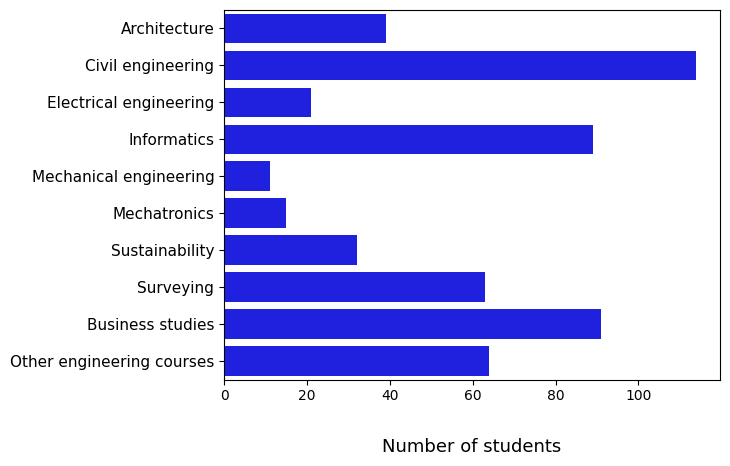

In [4]:
specializations_plot = sns.countplot(y=acceptance_df["1.1"], color = "blue");
specializations_plot.set_yticklabels(specializations_en, size = 11);
specializations_plot.set_xlabel("Number of students", size = 13, labelpad=25);
specializations_plot.set_ylabel(None);

## Duplicates and missing data

### Duplicates

In [5]:
# Uncomment to check the number of duplicated rows
print("The pre-analysis shows that there are no duplicates!")

The pre-analysis shows that there are no duplicates!


### Missing data

<font size="+1"><i>Rows with missing data</i></font>
<!---
HTML ways to set / increase the font size.
Note that 7 is the maximum size for browsers!
<font size="7"><center>Thank you!</center></font>
<font size="+4"><center>Thank you!</center></font>
-->

In [6]:
na_perc_row = round(100*(len(acceptance_df)-len(acceptance_df.dropna()))/len(acceptance_df), 2)
print("Percentage of rows containing a NaN:", na_perc_row)

Percentage of rows containing a NaN: 40.32


In [7]:
na_rows_display_df = acceptance_df.copy()
na_rows_display_df["na_share"] = na_rows_display_df.isnull().sum(axis=1)/na_rows_display_df.shape[1]
na_rows_display_df = na_rows_display_df.iloc[:,-1:]
na_rows_display_df = round(100*na_rows_display_df)

for i in np.arange(10,100,step=15):
    print(
        len(na_rows_display_df[na_rows_display_df["na_share"]>i]),
        f"rows contain more than {i} % NAs"
    )

78 rows contain more than 10 % NAs
34 rows contain more than 25 % NAs
25 rows contain more than 40 % NAs
10 rows contain more than 55 % NAs
7 rows contain more than 70 % NAs
7 rows contain more than 85 % NAs


In [8]:
print("Top 10 rows with largest NaN percentages:")
nan_percentages_row_head_10 = acceptance_df.isnull().sum(axis=1
).sort_values(ascending=False).head(10)/acceptance_df.shape[1]
nan_percentages_row_head_10 = round(100*nan_percentages_row_head_10)
nan_percentages_row_head_10
# Removing these is not a good idea, we may try to impute values later (see below)!

Top 10 rows with largest NaN percentages:


SurveyID
390    100.0
375    100.0
245    100.0
530    100.0
529    100.0
452    100.0
306     86.0
429     68.0
430     68.0
419     64.0
dtype: float64

<font size="+2"><i>Columns with missing data</i></font>

<!---
HTML ways to set / increase the font size.
Note that 7 is the maximum size for browsers!
<font size="7"><center>Thank you!</center></font>
<font size="+4"><center>Thank you!</center></font>
-->

In [9]:
print(
    "Percentage of columns containing a NaN:",
    100*len(acceptance_df.isnull().sum())/acceptance_df.shape[1],
    "%\n"
)

Percentage of columns containing a NaN: 100.0 %



In [10]:
print("Top 10 columns with largest NaN percentages:")
nan_percentages_head_10 = acceptance_df.isnull().sum(
).sort_values(ascending=False).head(10)/len(acceptance_df)
nan_percentages_head_10 = round(100*nan_percentages_head_10)
nan_percentages_head_10

Top 10 columns with largest NaN percentages:


1.3     13.0
2.22     8.0
2.20     8.0
2.24     8.0
2.12     8.0
2.14     7.0
2.18     7.0
2.16     6.0
2.2      6.0
2.10     6.0
dtype: float64

## Superfluous columns

Pre-analysis shows that the columns "1.2" (Studiengang) and "1.4" (Schulabschluss in Deutschland?) are almost constant, hence we exclude them from further studies:

In [11]:
# Investigate columns 1.2 (Studiengang) and
# 1.4 (Schulabschluss in Deutschland)
acceptance_12_14_df = acceptance_df.copy()[["1.2","1.4"]]

# Drop missing values
acceptance_12_14_df.dropna(inplace=True)

# acceptance_df = acceptance_df.astype('int')
acceptance_12_14_df = acceptance_12_14_df.astype('int')

In [12]:
# Adjustment of the bar width in seaborn.countplot:
def change_width(ax, new_width):
    for patch in ax.patches:
        current_width = patch.get_width()
        difference = current_width - new_width

        # Set new width
        patch.set_width(new_width)

        # Now Recenter the Bars
        patch.set_x(patch.get_x() + difference * .5)

# https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot
# https://aihints.com/how-to-change-bar-width-in-seaborn/

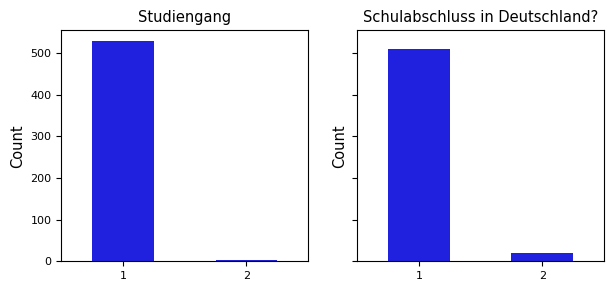

In [13]:
sns.set_context(rc={"font.size":8,"axes.titlesize":10.5,"axes.labelsize":10.5})
fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

# Studiengang
sns.countplot(ax=axes[0], x=acceptance_12_14_df["1.2"], color = "blue")
axes[0].set(title="Studiengang",xlabel=None,ylabel="Count")
change_width(axes[0], 0.5)

# Schulabschluss in Deutschland
sns.countplot(ax=axes[1], x ='1.4', data = acceptance_12_14_df, color = "blue")
axes[1].set(title="Schulabschluss in Deutschland?",xlabel=None,ylabel="Count");
change_width(axes[1], 0.5)

In [14]:
# An old approach found the following columns superfluous:
# superfluous_columns = [
#     "1.2","1.3","1.4","2.2","2.4","2.6","2.10",
#     "2.15","2.16","2.17","2.19","2.21","2.22","2.23"
#     ]
# But we decided to keep these columns, we remove only "1.2","1.3" and "1.4"
superfluous_columns = ["1.2","1.3","1.4"]
acceptance_df = acceptance_df.drop(columns = superfluous_columns)

## DataFrame-wide analysis

### Detecting Outliers

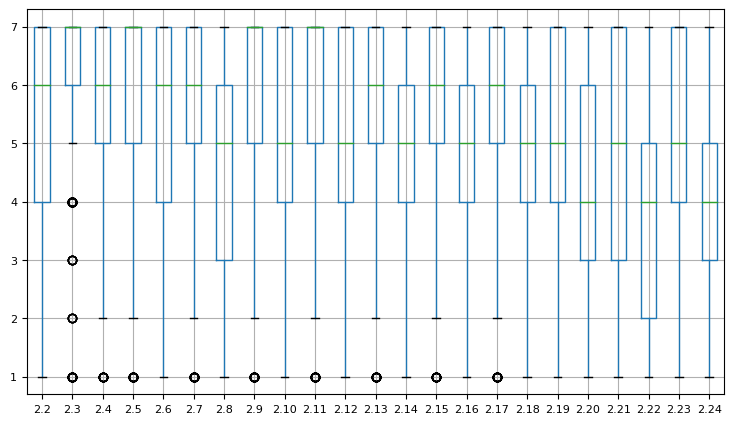

In [15]:
acceptance_df[list(acceptance_df.columns[2:])].boxplot(figsize=(9,5));

We observe that possibly there are outliers in <i>2.1, <span style="color: red">2.3</span>, 2.4, 2.5, 2.7, 2.9, 2.11, 2.13, 2.15.</i>

### Detecting Outliers (continued)

<br>
The variable 2.3 reads:<br>
<font color="magenta"><i>The university will ensure that all my educational data will be kept securely. -> Ideally, I would like that happen.</i></font>

Its visualization shows that we cannot assert the existence of outliers for the considered question:

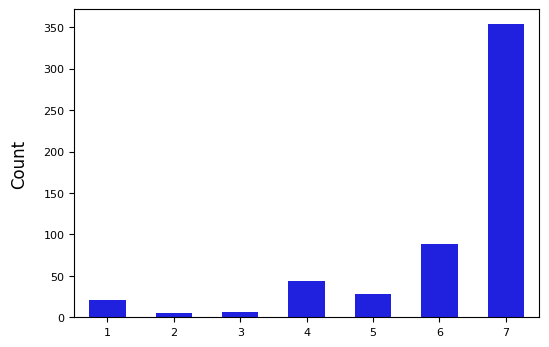

In [16]:
col_23 = round(acceptance_df["2.3"]).dropna().astype("int")
ax_23 = sns.countplot(x=col_23, color = "blue") # color="skyblue"
ax_23.set(xlabel=None);
ax_23.set_ylabel("Count", size = 12, labelpad=11)
change_width(ax_23, 0.55)
ax_23.figure.set_figwidth(6);
ax_23.figure.set_figheight(4);

### Pairplot

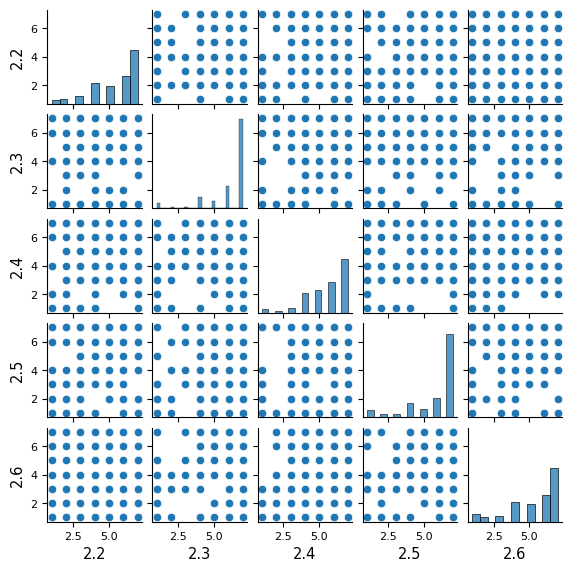

In [17]:
# sns.set(style='white')
sns.pairplot(acceptance_df.iloc[:,2:7], height=1.15)
plt.show()

#### Compare to normal distribution

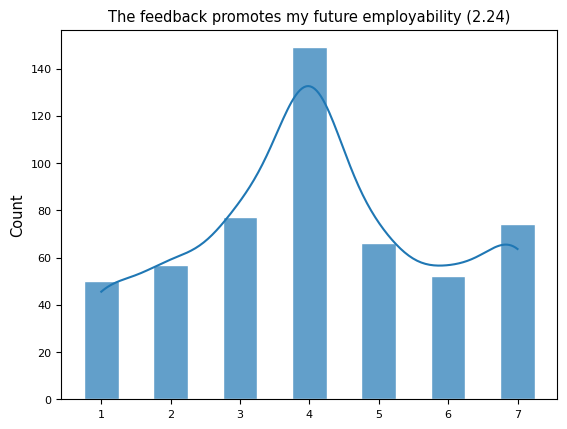

In [18]:
plt.title('The feedback promotes my future employability (2.24)')
sns.set_context(rc={"font.size":10,"axes.titlesize":12,"axes.labelsize":12})

# Short solution
ax_24 = sns.histplot(acceptance_df['2.24'],edgecolor="white",color="tab:blue",
                     discrete=True,shrink=0.5,kde=True,alpha=0.7)
# color suggestions: "cadetblue",darkcyan,teal,lightseagreen,tab:blue,steelblue;'#4F81BD'
ax_24.set(xlabel=None);

# # Long solution
# bin_gap = 1 # integers only
# n_hist_features = len(acceptance_df['2.24'].value_counts())
# n_bins = n_hist_features + bin_gap*(n_hist_features-1)

# ax_24 = sns.histplot(x=acceptance_df['2.24'],color="cyan",kde=True,bins=n_bins);
# ax_24.set(xlabel=None);

# # Centering histogram bins
# # This fix works if we do not use the parameter "binwidth" in "sns.histplot"
# min_val, max_val = (acceptance_df['2.24'].min(),acceptance_df['2.24'].max())
# val_width = max_val - min_val
# bin_width = val_width/n_bins
# correction_vector = bin_width/2 - np.arange(0,n_hist_features)*bin_width/(n_hist_features-1)
# plt.xticks(np.arange(1,8)+correction_vector,np.arange(1,8));

## Correlations

A beautiful way of looking at this data is the use of heatmaps:

In [19]:
corr_matrix = acceptance_df.iloc[:,2:].corr()

# Mask the diagonal and low correlations
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.abs(corr_matrix) < 0.3] = True
mask[np.triu_indices_from(mask)] = True

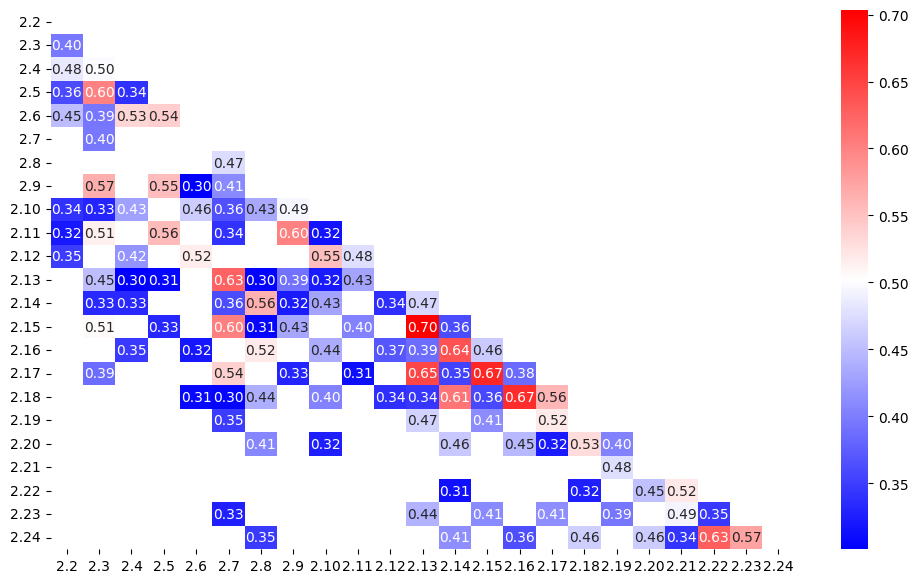

In [20]:
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask,
xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
cmap= "bwr");
# plt.savefig("./output/"+"heatmap"+".pdf", format="pdf", bbox_inches="tight");

Let's *regress `2.5` on `2.9`* (scatterplot of `2.5` on y-axis versus `2.9` on x):

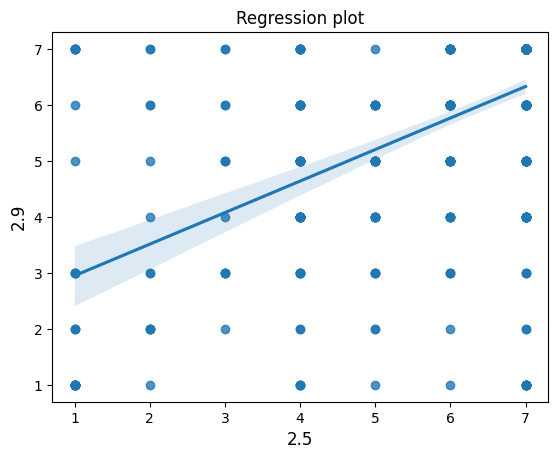

In [21]:
sns.regplot(x='2.5', y='2.9', data=acceptance_df).set_title("Regression plot");

 <font size="5">A professional way to look at this data is Pandas Profiling (ydata-profiling)!</font>

<center><span style="color:blue;font-weight:550;font-size:100px"> 
Thank you!
</span></center>
<!---
HTML ways to set / increase the font size.
Note that 7 is the maximum size for browsers!
<font size="7"><center>Thank you!</center></font>
<font size="+4"><center>Thank you!</center></font>
-->

To save only the outputs as a html / Reveal.js presentation, first activate the light (default) mode of jupyter with this Terminal command:

`jt -r`

Then run the following command from Terminal:

`jupyter nbconvert --to slides --TemplateExporter.exclude_input=True 020_presentation_1.ipynb`

After that one can activate the dark theme again:

`jt -t onedork -fs 11 -tfs 13 -nfs 115 -cellw 88% -T`